**1. Load your dataset from the “CO2 Emissions.csv” csv file**

In [1]:
import pandas as pd
import warnings as w
w.filterwarnings('ignore')

df_1 = pd.read_csv("/kaggle/input/co2-emissions/CO2 Emissions.csv")
df_1.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**2. Explore your dataset and list the name of the text columns.**

In [2]:
df_1.shape

(7385, 12)

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df_1.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [5]:
df_1.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

**3. Explore your dataset and check if there is any column with missing values.**

In [6]:
df_1.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

**4. Select your input variables (only select integer valued columns and columns without missing values) and ourput variable (hint: output colum is the one you want to predict).**

In [7]:
X_1 = df_1[['Cylinders', 'Fuel Consumption Comb (mpg)']]
y_1 = df_1['CO2 Emissions(g/km)']

**5. Split your dataset as %80 training and %20 testing**

In [8]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2)

**6. Scale your training data and testing data inputs**

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_test_scaled_1 = scaler.transform(X_test_1)

**7. Implement three different neural networks one with 1 layer, one with 2 layers and one with 3 layers using either the ski-learn or Keras python libraries and train them using the training dataset.**

In [10]:
from sklearn.neural_network import MLPRegressor

# 1-layer neural network
nn1 = MLPRegressor(hidden_layer_sizes=(100,), activation='relu',
                   solver='adam', random_state=42)
nn1.fit(X_train_scaled_1, y_train_1)

# 2-layer neural network
nn2 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu',
                   solver='adam', random_state=42)
nn2.fit(X_train_scaled_1, y_train_1)

# 3-layer neural network
nn3 = MLPRegressor(hidden_layer_sizes=(100, 50, 25), activation='relu',
                   solver='adam', random_state=42)
nn3.fit(X_train_scaled_1, y_train_1)

MLPRegressor(hidden_layer_sizes=(100, 50, 25), random_state=42)

**8. Compare their accuracies by means of the test data set using Mean Absolute Error, Mean Squared Error, R2 score and Root Mean Squared Error metrics. Which neural network is better than the others.**

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(model):
    y_pred_1 = model.predict(X_test_1)
    mae = mean_absolute_error(y_test_1, y_pred_1)
    mse = mean_squared_error(y_test_1, y_pred_1)
    rmse = mean_squared_error(y_test_1, y_pred_1, squared=False)
    r2 = r2_score(y_test_1, y_pred_1)
    return (mae, mse, rmse, r2)

print("1-layer NN evaluation:", evaluate(nn1))
print("2-layer NN evaluation:", evaluate(nn2))
print("3-layer NN evaluation:", evaluate(nn3))

1-layer NN evaluation: (547.8812832683398, 301818.544433483, 549.3801456491516, -85.6854681882671)
2-layer NN evaluation: (57.57000531904236, 6017.030829391581, 77.56952255487707, -0.7281546948285613)
3-layer NN evaluation: (243.9127861617505, 62558.39763091066, 250.11676799229326, -16.96743138471536)


**9. Plot the Actual vs Predicted graph of the best model.**

In [12]:
y_pred_1 = nn2.predict(X_test_scaled_1)

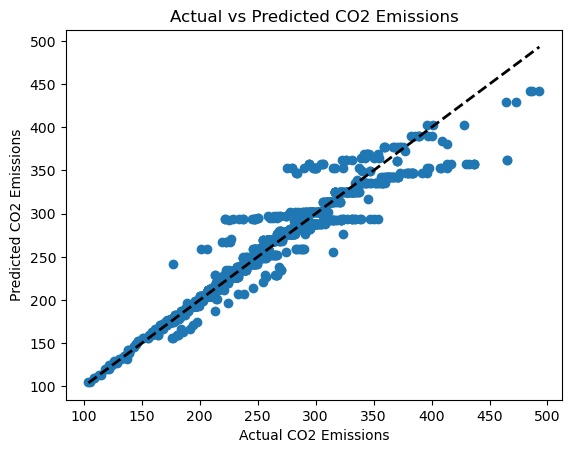

In [13]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.scatter(y_test_1, y_pred_1)
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'k--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

**1. Load your dataset from the “internet_connection_data.csv” csv file.**

In [14]:
df_2 = pd.read_csv("/kaggle/input/internet-connection-data/internet_connection_data.csv")
df_2.head()

,Memory_PssTotal,Memory_PssClean,Memory_SharedDirty,Memory_PrivateDirty,Memory_SharedClean,Memory_PrivateClean,Memory_HeapSize,Memory_HeapAlloc,Memory_HeapFree,Memory_Views,...,API_Base64_android.util.Base64_decode,API_SystemManager_android.app.ApplicationPackageManager_setComponentEnabledSetting,API_SystemManager_android.content.BroadcastReceiver_abortBroadcast,API_SMS_android.telephony.SmsManager_sendTextMessage,API_DeviceData_android.content.ContentResolver_registerContentObserver,Network_TotalReceivedBytes,Network_TotalReceivedPackets,Network_TotalTransmittedBytes,Network_TotalTransmittedPackets,Category
0,46430,5156,11304,34336,86444,5176,15429,11470,3958,61,...,0,0,0,0,0,12519646,9033,142613,3551,Adware
1,35437,3064,12396,25632,91220,3080,13074,10631,2442,7,...,36,0,0,0,0,0,0,0,0,Adware
2,56846,2340,10768,47296,95940,2592,16154,11361,4792,174,...,0,0,0,0,0,6601,59,9602,71,Adware
3,30576,1152,12664,24312,78192,1164,7913,4720,3192,0,...,0,0,0,0,0,0,0,0,0,Adware
4,148452,19332,10808,122364,87080,20104,44830,34063,10766,137,...,0,0,0,0,20,2132046,2364,220625,1938,Adware


**2. Explore your dataset and list the name of the columns**

In [15]:
df_2.shape

(47032, 46)

In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47032 entries, 0 to 47031
Data columns (total 46 columns):
 #   Column                                                                              Non-Null Count  Dtype 
---  ------                                                                              --------------  ----- 
 0   Memory_PssTotal                                                                     47032 non-null  int64 
 1   Memory_PssClean                                                                     47032 non-null  int64 
 2   Memory_SharedDirty                                                                  47032 non-null  int64 
 3   Memory_PrivateDirty                                                                 47032 non-null  int64 
 4   Memory_SharedClean                                                                  47032 non-null  int64 
 5   Memory_PrivateClean                                                                 47032 non-null  in

In [17]:
df_2.describe()

,Memory_PssTotal,Memory_PssClean,Memory_SharedDirty,Memory_PrivateDirty,Memory_SharedClean,Memory_PrivateClean,Memory_HeapSize,Memory_HeapAlloc,Memory_HeapFree,Memory_Views,...,API_DexClassLoader_dalvik.system.DexFile_loadDex,API_Base64_android.util.Base64_decode,API_SystemManager_android.app.ApplicationPackageManager_setComponentEnabledSetting,API_SystemManager_android.content.BroadcastReceiver_abortBroadcast,API_SMS_android.telephony.SmsManager_sendTextMessage,API_DeviceData_android.content.ContentResolver_registerContentObserver,Network_TotalReceivedBytes,Network_TotalReceivedPackets,Network_TotalTransmittedBytes,Network_TotalTransmittedPackets
count,47032.000000,47032.000000,47032.000000,47032.000000,47032.000000,47032.000000,47032.000000,47032.000000,47032.000000,47032.000000,...,47032.000000,47032.000000,47032.000000,47032.000000,47032.000000,47032.000000,4.703200e+04,47032.00000,4.703200e+04,47032.000000
mean,70066.030277,12696.908573,10858.466661,46776.315275,87947.190764,14305.071015,21836.077458,17179.782935,4655.302220,83.215704,...,0.121407,226.005060,3.985818,0.028810,0.172670,27.414654,1.083389e+06,830.12921,3.160736e+04,478.422457
std,35067.733913,12923.587798,2244.178601,28335.704319,15994.720499,13488.810568,12251.405628,10234.316094,2878.223628,163.565694,...,1.781443,858.208668,91.191986,0.236024,2.806416,58.934643,1.114890e+07,7881.72742,1.686664e+05,3801.344833
min,4506.000000,0.000000,7036.000000,12.000000,4268.000000,0.000000,5113.000000,3249.000000,983.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000
25%,45996.000000,3952.000000,10544.000000,31876.000000,76444.000000,5008.000000,13240.000000,10349.750000,2976.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000
50%,60454.500000,6264.000000,10728.000000,41064.000000,89640.000000,8152.000000,20066.000000,16360.500000,4008.000000,34.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.236000e+03,10.00000,3.544500e+03,20.000000
75%,91019.750000,19909.000000,11132.000000,54669.000000,99180.000000,21541.000000,27820.000000,22274.250000,5730.000000,112.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.110225e+04,68.00000,1.626325e+04,120.000000
max,829169.000000,106360.000000,446548.000000,826672.000000,183600.000000,110336.000000,310155.000000,253856.000000,88630.000000,11164.000000,...,62.000000,26729.000000,9296.000000,15.000000,306.000000,1302.000000,2.320056e+08,166574.00000,5.826047e+06,85873.000000


In [18]:
df_2.columns

Index(['Memory_PssTotal', 'Memory_PssClean', 'Memory_SharedDirty',
       'Memory_PrivateDirty', 'Memory_SharedClean', 'Memory_PrivateClean',
       'Memory_HeapSize', 'Memory_HeapAlloc', 'Memory_HeapFree',
       'Memory_Views', 'Memory_ViewRootImpl', 'Memory_AppContexts',
       'Memory_Activities', 'Memory_Assets', 'Memory_AssetManagers',
       'Memory_LocalBinders', 'Memory_ProxyBinders', 'Memory_ParcelMemory',
       'Memory_ParcelCount', 'API_Command_java.lang.Runtime_exec',
       'API_Command_java.lang.ProcessBuilder_start',
       'API_WebView_android.webkit.WebView_loadUrl',
       'API_FileIO_android.content.ContextWrapper_deleteFile',
       'API_Database_android.database.sqlite.SQLiteDatabase_update',
       'API_IPC_android.content.ContextWrapper_stopService',
       'API_Binder_android.app.ContextImpl_registerReceiver',
       'API_Crypto_javax.crypto.spec.SecretKeySpec_$init',
       'API_Crypto-Hash_java.security.MessageDigest_digest',
       'API_Crypto-Hash_java.sec

**3. Explore your dataset and check if there is any column with missing values.**

In [19]:
df_2.isnull().sum()

Memory_PssTotal                                                                       0
Memory_PssClean                                                                       0
Memory_SharedDirty                                                                    0
Memory_PrivateDirty                                                                   0
Memory_SharedClean                                                                    0
Memory_PrivateClean                                                                   0
Memory_HeapSize                                                                       0
Memory_HeapAlloc                                                                      0
Memory_HeapFree                                                                       0
Memory_Views                                                                          0
Memory_ViewRootImpl                                                                   0
Memory_AppContexts              

**4. Select your input variables and ourput variable (hint: output colum is the one you want to predict. In this case it is the last column which shows the type of network attack).**

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df_2.head(1)

,Memory_PssTotal,Memory_PssClean,Memory_SharedDirty,Memory_PrivateDirty,Memory_SharedClean,Memory_PrivateClean,Memory_HeapSize,Memory_HeapAlloc,Memory_HeapFree,Memory_Views,...,API_Base64_android.util.Base64_decode,API_SystemManager_android.app.ApplicationPackageManager_setComponentEnabledSetting,API_SystemManager_android.content.BroadcastReceiver_abortBroadcast,API_SMS_android.telephony.SmsManager_sendTextMessage,API_DeviceData_android.content.ContentResolver_registerContentObserver,Network_TotalReceivedBytes,Network_TotalReceivedPackets,Network_TotalTransmittedBytes,Network_TotalTransmittedPackets,Category
0,46430,5156,11304,34336,86444,5176,15429,11470,3958,61,...,0,0,0,0,0,12519646,9033,142613,3551,Adware


In [22]:
X_2 = df_2.drop('Category', axis=1)
y_2 = le.fit_transform(df_2['Category'])

**5. Split your dataset as %80 training and %20 testing.**

In [23]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2)

**6. Scale your training data and testing data inputs.**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)

**7. Implement three different neural networks one with 1 layer, one with 2 layers and one with 3 layers using either the ski-learn or Keras python libraries and train them using the training dataset.**

In [25]:
from sklearn.neural_network import MLPClassifier

# 1-layer neural network
nn1_2 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
nn1_2.fit(X_train_scaled_2, y_train_2)

# 2-layer neural network
nn2_2 = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
nn2_2.fit(X_train_scaled_2, y_train_2)

# 3-layer neural network
nn3_2 = MLPClassifier(hidden_layer_sizes=(100, 50, 25), activation='relu', solver='adam', random_state=42)
nn3_2.fit(X_train_scaled_2, y_train_2)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), random_state=42)

**8. Compare their accuracies by means of the test data set using accuracy, precision, recall and F1-score metrics. Which neural network is better than the others.**

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate1(model):
    y_pred_2 = model.predict(X_test_2)
    accuracy = accuracy_score(y_test_2, y_pred_2)
    precision = precision_score(y_test_2, y_pred_2, average='weighted')
    recall = recall_score(y_test_2, y_pred_2, average='weighted')
    f1 = f1_score(y_test_2, y_pred_2, average='weighted')
    return (accuracy, precision, recall, f1)

print("1-layer NN accuracy:", evaluate1(nn1_2))
print("2-layer NN accuracy:", evaluate1(nn2_2))
print("3-layer NN accuracy:", evaluate1(nn3_2))

1-layer NN accuracy: (0.23439991495694695, 0.12747532172672527, 0.23439991495694695, 0.1498109182887423)
2-layer NN accuracy: (0.17540129690655895, 0.3885374846782689, 0.17540129690655895, 0.06814471983803182)
3-layer NN accuracy: (0.24194748591474433, 0.14928868706678877, 0.24194748591474433, 0.17625887916571117)


**9. Plot the confussion matrix of the best model.**

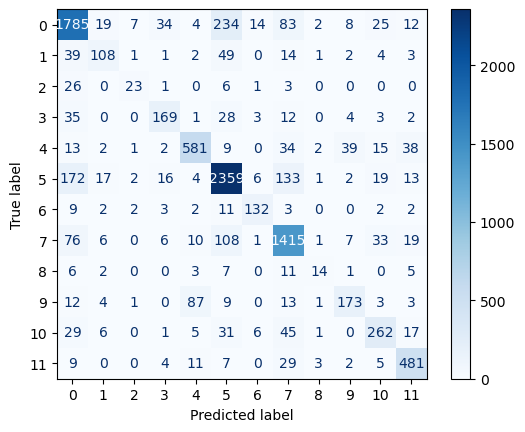

In [27]:
from sklearn.metrics import plot_confusion_matrix

best_model = nn2_2 # Assuming that 2-layer NN is the best model
plot_confusion_matrix(best_model, X_test_scaled_2, y_test_2, cmap='Blues')